# Titanic: Survival Prediction Using Machine Learning
In this notebook we are going to be doing the **Titanic - Machine Learning from Disaster** competition by Kaggle.
The objective of the notebook is:
* Predict if the passengers **survived** or **not**.

**IMPORTANT**: This dataset is not the only way of aproaching the competition, is how i thought as a trainee data scientist. I hope it will be helpful for all of you, all constructive comments are welcome. Thank you! 

**Lets start!**

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# Loading the Data

In [2]:
train_data = pd.read_csv('../input/c/titanic/train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_data = pd.read_csv('../input/c/titanic/test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Analysis
Lets have a look to the data, in order to see what we are dealing with.

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that we have **Nan values** in three variables:
* 'Age'
* 'Cabin' (Most values are Nan, we will have to analyse why, if is a missing data problem or maybe they did not have a cabin.
* 'Embarked' (Just 2)

In [5]:
cols = ['Embarked', 'Sex', 'Pclass', 'Survived']

for col in cols:
    print(train_data[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
    print('\n')

S    72.4%
C    18.9%
Q     8.7%
Name: Embarked, dtype: object


male      64.8%
female    35.2%
Name: Sex, dtype: object


3    55.1%
1    24.2%
2    20.7%
Name: Pclass, dtype: object


0    61.6%
1    38.4%
Name: Survived, dtype: object




With those simple lines of code, we can observe that:
* The data set is **unbalanced** (having 23% between survived and non survived passengers),
* Most people embarked on **S**(Southampton), the second busiest was **C**(Cherbourg) and the one where less people embarked is **Q** (Queenstown),
* There were 30% more of male passengers on board the Titanic.
* Over half of the passengers belonged to 3rd class. And the rest was split almost equally between 1st and 2nd class.

In [6]:
print(train_data['Age'].describe())
print('\n')
print(train_data['Fare'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


**1.** As mentioned before, in 'Age' we are missing some values. We can highlight that the youngest person on board must have been a new born, as it has less than 1 year of age. While the oldest was 80 years old. 

**2.** We can see in the second chart that the max Fare is a lot bigger that the mean, so it may be an outlier or will see after analysing that variable.

In [7]:
print(train_data['Name'].head(20))

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

We can see that all passengers have a 'Status' inside their names. We are going to extract it and try to get some info out of them.

In [8]:
train_data['Status'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(train_data['Status'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Status, dtype: int64


In [9]:
'''
Some of the 'Status' are very similar, we are going to group them in order to have a more clear idea of what we are dealing with.
'''
train_data['Status'] = train_data['Status'].replace(['Lady', 'Countess', 'Don', 'Sir', 'Jonkheer', 'Dona'], 'Royal')

train_data['Status'] = train_data['Status'].replace(['Capt', 'Col','Major', 'Rev', 'Dr'], 'Officers')

train_data['Status'] = train_data['Status'].replace('Mlle', 'Miss')
train_data['Status'] = train_data['Status'].replace('Ms', 'Miss')
train_data['Status'] = train_data['Status'].replace('Mme', 'Mrs')

print(train_data['Status'].value_counts())

Mr          517
Miss        185
Mrs         126
Master       40
Officers     18
Royal         5
Name: Status, dtype: int64


In [10]:
print(train_data.loc[train_data['Status'] == 'Master', 'Age'].describe())
print('\n')
print(train_data.loc[train_data['Status'] == 'Master', 'Sex'].value_counts())

count    36.000000
mean      4.574167
std       3.619872
min       0.420000
25%       1.000000
50%       3.500000
75%       8.000000
max      12.000000
Name: Age, dtype: float64


male    40
Name: Sex, dtype: int64


We can observe that ALL passengers with the **'Status == Master'** are **under 12** years old and are **male**. 
We are going to use this info to try to fill some missing data in the most accurate way.

In [11]:
train_data.groupby(['Status','Sex']).Age.mean()

Status    Sex   
Master    male       4.574167
Miss      female    21.845638
Mr        male      32.368090
Mrs       female    35.788991
Officers  female    49.000000
          male      46.562500
Royal     female    40.500000
          male      42.333333
Name: Age, dtype: float64

In [12]:
print(train_data[train_data['Embarked'].isnull()])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked Status  
61   female  38.0      0      0  113572  80.0   B28      NaN   Miss  
829  female  62.0      0      0  113572  80.0   B28      NaN    Mrs  


After doing some futher analysis on the two missing values in 'Embarked', i run into a forum that talked about it. It explained that 'Icard, Miss. Amelie' boarded the titanic as the maid of 'Stone, Mrs. George Nelson (Martha Evelyn). They both embarked in 'Southampton'. (This is the only external information used in this notebook)

In [13]:
train_data['Cabin'] = train_data['Cabin'].str.extract('([A-Za-z]+)', expand=False)
print(train_data['Cabin'].value_counts())

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64


We extracted the letter from the 'Cabin' variable. I want to see if there is any posibility of filling the missing values or getting something out of this column. Or if it is just useless.

# Nan Values

In [14]:
'''
Filling all the Males with rank master the mean we obtain before
'''
train_data['Age'] = np.where((train_data['Status'] == 'Master') & (train_data['Age'].isnull()), train_data['Age'].fillna(4.5), train_data['Age'])
'''
We will fill the rest with the average of each social status
'''
train_data['Age'] = np.where((train_data['Status'] == 'Miss') & (train_data['Age'].isnull()), train_data['Age'].fillna(21.8), train_data['Age'])

train_data['Age'] = np.where((train_data['Status'] == 'Mr') & (train_data['Age'].isnull()), train_data['Age'].fillna(32.3), train_data['Age'])

train_data['Age'] = np.where((train_data['Status'] == 'Mrs') & (train_data['Age'].isnull()), train_data['Age'].fillna(35.8), train_data['Age'])

train_data['Age'] = np.where((train_data['Status'] == 'Officers') & (train_data['Age'].isnull()), train_data['Age'].fillna(47.5), train_data['Age'])

train_data['Age'] = np.where((train_data['Status'] == 'Royal') & (train_data['Age'].isnull()), train_data['Age'].fillna(41), train_data['Age'])

'''
Filling the 'Embarked' with S (explained before)
'''
train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [15]:
'''
With Cabin we are going to try two methods,assigning if they had or not a cabin. 
And we will also try removing the variable and see what happends. 
First we are going to say if they had or not a cabin, and see how the model reacts. If we see that
it is useful we will leave it, else we will drop the column or check other more apropiate methods.
'''
train_data['Has_cabin'] = np.where(train_data['Cabin'].isnull(), 0, 1)
train_data.drop('Cabin', axis = 1, inplace = True)

In [16]:
columns = train_data.columns
for column in columns:
    has_nan = train_data[column].isnull().sum(axis = 0)
    print(f'{column}: {has_nan}')
    
print(train_data.isnull().values.any())

PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Embarked: 0
Status: 0
Has_cabin: 0
False


We have taken care of all the Nan values in the data set.

# Feature Engineering

In [17]:
'''
Creating variable to detect if it was considered a child or not. Acording to the oficial Titanic data, 12 or under was 
consider a child. Older it was an adult.
'''
train_data['Is_child'] = np.where(train_data['Age'] <= 12, 1, 0)

'''
Transform Sex in numeric
'''
train_data['Sex'] = np.where(train_data['Sex'] == 'male', 1,0)

'''
From the Name we have already extracted the 'Status', maybe we could do something with the families, so just in case we will
also extract the surname in case we want to use it later.
'''
train_data['Surname'] = train_data['Name'].str.extract('([A-Za-z]+)\,', expand=False)
print(train_data['Surname'].value_counts())
train_data.drop('Name', axis = 1, inplace = True)

Andersson    9
Sage         7
Panula       6
Johnson      6
Skoog        6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: Surname, Length: 666, dtype: int64


In [18]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Status,Has_cabin,Is_child,Surname
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,S,Mr,0,0,Braund
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C,Mrs,1,0,Cumings
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,0,Heikkinen
3,4,1,1,0,35.0,1,0,113803,53.1000,S,Mrs,1,0,Futrelle
4,5,0,3,1,35.0,0,0,373450,8.0500,S,Mr,0,0,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,S,Officers,0,0,Montvila
887,888,1,1,0,19.0,0,0,112053,30.0000,S,Miss,1,0,Graham
888,889,0,3,0,21.8,1,2,W./C. 6607,23.4500,S,Miss,0,0,Johnston
889,890,1,1,1,26.0,0,0,111369,30.0000,C,Mr,1,0,Behr


In [19]:
train_data.drop('Ticket', axis = 1, inplace = True)
'''
We drop the Ticket variable because a large % of them are unique values and i will be hard to make conclusion out of it.
'''

'\nWe drop the Ticket variable because a large % of them are unique values and i will be hard to make conclusion out of it.\n'

In [20]:
'''
Family organization
'''
train_data['Fam_size'] = train_data['SibSp'] + train_data['Parch']

train_data['Solo'] = np.where(train_data['Fam_size'] == 0, 1, 0)

train_data.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

In [21]:
'''
Fare
We will transfor the Fare (which is per family/group) into a personal fare.
'''
train_data['Fare'] = train_data['Fare'] / (train_data['Fam_size'] + 1)

In [22]:
'''
I tried a couple variables using the surname column that we extracted before, but non of those were game changing so 
we drop the 'Surname' column for now.
'''
train_data.drop('Surname', axis = 1, inplace = True)

# Bins for 'Age'
We are going to try using bins. If it does not work as we want, we will normalize the data

In [23]:
train_data['Age'] = pd.cut(train_data['Age'], 6)

# Dummies Variables

In [24]:
def createDummies(df, var_name):
    dummy = pd.get_dummies(df[var_name], prefix=var_name)
    df = df.drop(var_name, axis= 1)
    df = pd.concat([df, dummy], axis = 1)
    return df

In [25]:
train_data = createDummies(train_data, 'Status')

train_data = createDummies(train_data, 'Embarked')

train_data = createDummies(train_data, 'Age')


# Normalizing the Data
For now we are only going to normalize the Fare column

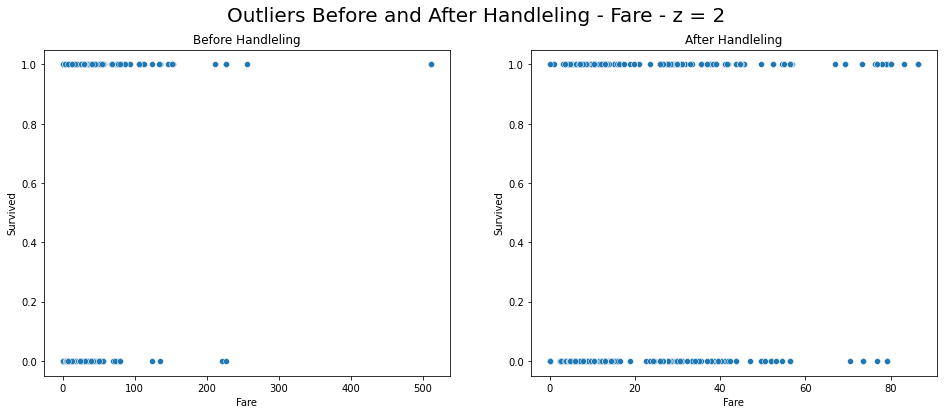

In [26]:
'''
Handleling Outliers
'''

def outliers_check(df, feature_1, feature_2, threshold):

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Outliers Before and After Handleling - {feature_1} - z = {threshold}', fontsize=20)
    
    sns.scatterplot(ax=axes[0], data=df, x=feature_1, y=feature_2)
    axes[0].set_title('Before Handleling')
    
    mean_m2 = np.mean(df[feature_1])
    
    std_m2 = np.std(df[feature_1])
        
    df['z'] = (df[feature_1] - mean_m2)/std_m2
    
    df['z_filter'] = np.where(df['z'] >= threshold, 1,0)
    
    df.drop(df[train_data['z_filter'] == 1].index, inplace = True)
    
    df.drop('z', axis = 1, inplace = True)
    df.drop('z_filter', axis = 1, inplace = True)
    
    sns.scatterplot(ax=axes[1], data=df, x=feature_1, y=feature_2)
    axes[1].set_title('After Handleling')
    plt.show()

#%%

outliers_check(train_data, 'Fare', 'Survived', 2)

In [27]:
'''
Normalizing some numeric data
'''

x_number = train_data[['Fare']]

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_number)

train_data[['Fare']] = x_scaled


# Separating ID

In [28]:
pass_id = train_data.pop('PassengerId')

# Correlation check

In [29]:
def correlation(df, threshold):
    col_corr = set()
    corr_matrix = train_data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


corr_try = correlation(train_data, 0.8)
print(corr_try)

{'Status_Mr', 'Age_(0.34, 13.683]'}


In [30]:
'''
We droped variables with high correlation.
'''
train_data.drop(corr_try, axis = 1, inplace = True)

In [31]:
train_data.rename(columns={'Age_(13.683, 26.947]': '13-27', 'Age_(26.947, 40.21]': '27-40',
                           'Age_(40.21, 53.473]':'40-53', 'Age_(53.473, 66.737]':'53-67',
                           'Age_(66.737, 80.0]': '67-80'}, inplace=True)

In [32]:
train_data

,Survived,Pclass,Sex,Fare,Has_cabin,Is_child,Fam_size,Solo,Status_Master,Status_Miss,...,Status_Officers,Status_Royal,Embarked_C,Embarked_Q,Embarked_S,13-27,27-40,40-53,53-67,67-80
0,0,3,1,0.041908,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,1,1,0,0.412042,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,3,0,0.091618,0,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,0
3,1,1,0,0.306936,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,3,1,0.093064,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0.150289,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
887,1,1,0,0.346821,1,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,0
888,0,3,0,0.067775,0,0,3,0,0,1,...,0,0,0,0,1,1,0,0,0,0
889,1,1,1,0.346821,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


# Train & Test split

In [33]:
target = train_data.pop('Survived')

X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size = 0.2, random_state = 22)

In [34]:
X_train

,Pclass,Sex,Fare,Has_cabin,Is_child,Fam_size,Solo,Status_Master,Status_Miss,Status_Mrs,Status_Officers,Status_Royal,Embarked_C,Embarked_Q,Embarked_S,13-27,27-40,40-53,53-67,67-80
617,3,0,0.093064,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0
40,3,0,0.054769,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
410,3,1,0.091281,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
830,3,0,0.083550,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
521,3,1,0.091281,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,1,0.303902,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
366,1,0,0.434971,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
364,3,1,0.089595,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
835,1,0,0.320456,1,0,2,0,0,1,0,0,0,1,0,0,0,1,0,0,0


In [35]:
y_train

617    0
40     0
410    0
830    1
521    0
      ..
512    1
366    1
364    0
835    1
133    1
Name: Survived, Length: 694, dtype: int64

# Balancing the Data

In [36]:
def undersampling(X_train, y_train, plus=1):

    X_train['y'] = y_train
    
    minor = X_train[X_train['y']==1]
    other = X_train[X_train['y']==0]
    other = other.sample(n=int(len(minor)*plus), random_state=22)
    X_train = (pd.concat([minor,other],axis=0)).sample(frac=1)
    
    y_train = X_train['y']
    X_train.drop('y', axis=1,inplace=True)

    return X_train, y_train


X_train, y_train = undersampling(X_train, y_train, 1.1)

In [37]:
print(y_train.value_counts())

0    281
1    256
Name: y, dtype: int64


In [38]:
train_data

,Pclass,Sex,Fare,Has_cabin,Is_child,Fam_size,Solo,Status_Master,Status_Miss,Status_Mrs,Status_Officers,Status_Royal,Embarked_C,Embarked_Q,Embarked_S,13-27,27-40,40-53,53-67,67-80
0,3,1,0.041908,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,1,0,0.412042,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,3,0,0.091618,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0
3,1,0,0.306936,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,3,1,0.093064,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,0.150289,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
887,1,0,0.346821,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0
888,3,0,0.067775,0,0,3,0,0,1,0,0,0,0,0,1,1,0,0,0,0
889,1,1,0.346821,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


# Model Creation
First we are going to use XGBoost Classifier to predict if the passengers survived or not. 
After obtaining a result with a basic model, we will search for the best sutable hyperparameters and seak for a better model.

In [39]:
#Model without parameters
no_params_model = xgb.XGBClassifier()
#Fitting the data to the model
no_params_model.fit(X_train, y_train)
#Predicting with the trained model
preds = no_params_model.predict(X_test)
#Printing the acuracy of the model
print(f'Predictions accuracy score: {accuracy_score(y_test,preds)}')

Predictions accuracy score: 0.8218390804597702


# Hyperparameter search (Randomized Search)

In [40]:
#Parameters
'''
params_XGB = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.01, 0.5, 1, 1.5, 2],
        'subsample': [0.6, 0.8, 1.0],
        'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.3],
        'max_depth': [3, 4, 5, 6, 7],
        'n_estimators': [100, 200, 400, 600, 800, 1000],
        }

params_model_xgb = xgb.XGBClassifier()

#Randomized Search
RS_xgb = RandomizedSearchCV(params_model_xgb, param_distributions=params_XGB)
RS_xgb.fit(X_train, y_train)

print(f'Best params for XGBoost Classifier using Random Search: {RS_xgb.best_params_}')
'''

"\nparams_XGB = {\n        'min_child_weight': [1, 5, 10],\n        'gamma': [0, 0.01, 0.5, 1, 1.5, 2],\n        'subsample': [0.6, 0.8, 1.0],\n        'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.3],\n        'max_depth': [3, 4, 5, 6, 7],\n        'n_estimators': [100, 200, 400, 600, 800, 1000],\n        }\n\nparams_model_xgb = xgb.XGBClassifier()\n\n#Randomized Search\nRS_xgb = RandomizedSearchCV(params_model_xgb, param_distributions=params_XGB)\nRS_xgb.fit(X_train, y_train)\n\nprint(f'Best params for XGBoost Classifier using Random Search: {RS_xgb.best_params_}')\n"

In [41]:
#Hyperparameters
best_params = {'subsample': 1.0, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.02, 'gamma': 0}
#Model with hyperparameters
model = xgb.XGBClassifier(**best_params, random_state = 22)
#Fitting the data to the model
model.fit(X_train, y_train)
#Predicting with the trained model
preds = model.predict(X_test)
#Printing the acuracy of the model
print(f'Predictions Accuracy Score: {accuracy_score(y_test,preds)}')
#Printing the F1 score of the model
f1 = f1_score(y_test, preds, average='macro')
print(f'Predictions F1 score: {f1}')
#Printing the Recall score of the model
recall = recall_score(y_test, preds)
print('Predictions Recall Score: %f' % recall)

Predictions Accuracy Score: 0.8448275862068966
Predictions F1 score: 0.8366197183098592
Predictions Recall Score: 0.805970


# Feature Importance

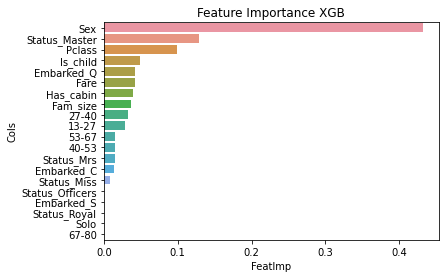

In [42]:
FeatImp_xgb = pd.DataFrame(data = {'Cols': X_train.columns.tolist(),'FeatImp':model.feature_importances_})
FeatImp_xgb.sort_values(by='FeatImp', inplace=True, ascending=False)
FeatImp_xgb.reset_index(inplace = True, drop = True)
sns.barplot(x='FeatImp', y='Cols', data=FeatImp_xgb.head(20))
plt.title('Feature Importance XGB')
plt.show()

# Test: Prediction
In this part of the code we are going to apply all the changes and tranformation made in the training set to the test set.

In [43]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [44]:
'''
Extracting Status
'''

test_data['Status'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

test_data['Status'] = test_data['Status'].replace(['Lady', 'Countess', 'Don', 'Sir', 'Jonkheer', 'Dona'], 'Royal')

test_data['Status'] = test_data['Status'].replace(['Capt', 'Col','Major', 'Rev', 'Dr'], 'Officers')

test_data['Status'] = test_data['Status'].replace('Mlle', 'Miss')
test_data['Status'] = test_data['Status'].replace('Ms', 'Miss')
test_data['Status'] = test_data['Status'].replace('Mme', 'Mrs')

print(test_data['Status'].value_counts())

Mr          240
Miss         79
Mrs          72
Master       21
Officers      5
Royal         1
Name: Status, dtype: int64


In [45]:
columns = test_data.columns
for column in columns:
    has_nan = test_data[column].isnull().sum(axis = 0)
    print(f'{column}: {has_nan}')
    
print(test_data.isnull().values.any())

PassengerId: 0
Pclass: 0
Name: 0
Sex: 0
Age: 86
SibSp: 0
Parch: 0
Ticket: 0
Fare: 1
Cabin: 327
Embarked: 0
Status: 0
True


In [46]:
'''
Nan values
'''
test_data['Age'] = np.where((test_data['Status'] == 'Master') & (test_data['Age'].isnull()), test_data['Age'].fillna(4.5), test_data['Age'])

test_data['Age'] = np.where((test_data['Status'] == 'Miss') & (test_data['Age'].isnull()), test_data['Age'].fillna(21.8), test_data['Age'])

test_data['Age'] = np.where((test_data['Status'] == 'Mr') & (test_data['Age'].isnull()), test_data['Age'].fillna(32.3), test_data['Age'])

test_data['Age'] = np.where((test_data['Status'] == 'Mrs') & (test_data['Age'].isnull()), test_data['Age'].fillna(35.8), test_data['Age'])

test_data['Age'] = np.where((test_data['Status'] == 'Officers') & (test_data['Age'].isnull()), test_data['Age'].fillna(47.5), test_data['Age'])

test_data['Age'] = np.where((test_data['Status'] == 'Royal') & (test_data['Age'].isnull()), test_data['Age'].fillna(41), test_data['Age'])


In [47]:
test_data.groupby(['Pclass','Sex']).Age.mean()

Pclass  Sex   
1       female    41.112000
        male      39.510526
2       female    24.757333
        male      31.026984
3       female    24.045417
        male      26.426096
Name: Age, dtype: float64

In [48]:
test_data.loc[test_data['Fare'].isnull()]

test_data['Fare'] = test_data['Fare'].fillna(26)

In [49]:
test_data['Has_cabin'] = np.where(test_data['Cabin'].isnull(), 0, 1)
test_data.drop('Cabin', axis = 1, inplace = True)

In [50]:
test_data['Is_child'] = np.where(test_data['Age'] <= 12, 1, 0)

test_data['Sex'] = np.where(test_data['Sex'] == 'male', 1,0)

test_data.drop('Name', axis = 1, inplace = True)

In [51]:
test_data.drop('Ticket', axis = 1, inplace = True)

In [52]:
test_data['Fam_size'] = test_data['SibSp'] + test_data['Parch']

test_data['Solo'] = np.where(test_data['Fam_size'] == 0, 1, 0)

test_data.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

In [53]:
test_data['Fare'] = test_data['Fare'] / (test_data['Fam_size'] + 1)

In [54]:
test_data['0-13'] = np.where(test_data['Age'] < 13, 1, 0)
test_data['13-27'] = np.where((test_data['Age'] <= 13) & (test_data['Age'] > 27), 1, 0)
test_data['27-40'] = np.where((test_data['Age'] <= 27) & (test_data['Age'] > 40), 1, 0)
test_data['40-53'] = np.where((test_data['Age'] >= 40) & (test_data['Age'] < 53), 1, 0)
test_data['53-67'] = np.where((test_data['Age'] >= 53) & (test_data['Age'] < 67), 1, 0)
test_data['67-80'] = np.where((test_data['Age'] >= 67) & (test_data['Age'] <= 80), 1, 0)

test_data.drop('Age', axis = 1, inplace = True)


In [55]:
test_data = createDummies(test_data, 'Status')

test_data = createDummies(test_data, 'Embarked')


In [56]:
test_data

,PassengerId,Pclass,Sex,Fare,Has_cabin,Is_child,Fam_size,Solo,0-13,13-27,...,67-80,Status_Master,Status_Miss,Status_Mr,Status_Mrs,Status_Officers,Status_Royal,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,7.829200,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,893,3,0,3.500000,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,894,2,1,9.687500,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,895,3,1,8.662500,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,896,3,0,4.095833,0,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,8.050000,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
414,1306,1,0,108.900000,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
415,1307,3,1,7.250000,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
416,1308,3,1,8.050000,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [57]:
test_data.drop(['0-13', 'Status_Mr'], axis = 1, inplace = True)

In [58]:
pass_id_test = test_data.pop('PassengerId')

In [59]:
x_scaled_test = min_max_scaler.transform(test_data[['Fare']])

test_data[['Fare']] = x_scaled_test


In [60]:
test_data

,Pclass,Sex,Fare,Has_cabin,Is_child,Fam_size,Solo,13-27,27-40,40-53,53-67,67-80,Status_Master,Status_Miss,Status_Mrs,Status_Officers,Status_Royal,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0.090511,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,0,0.040462,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,2,1,0.111994,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,3,1,0.100145,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3,0,0.047351,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,0.093064,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
414,1,0,1.258960,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
415,3,1,0.083815,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
416,3,1,0.093064,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


# Submission

In [61]:
test_submission = model.predict(test_data)

submission = pd.DataFrame({'PassengerId':pass_id_test, 'Survived':test_submission})

In [62]:
submission.to_csv("submission.csv", index = False)

In [63]:
submission


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
